In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [89]:
import pandas as pd

# Load Data 
file_path = "/kaggle/input/fetal-health-classification/fetal_health.csv"
data = pd.read_csv(file_path) 
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
#  LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# Scalling "standard scaler"
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#   Splite X& Y        
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']-1 # shift labels to start from 0

#     Splite data train & Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)




In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Input

# Build  ANN
model = Sequential()


# Add first layer (input layer )       
model.add(Input(shape=(X_train.shape[1],)))

# Add first layer (hidden layer ) , 64 neural units and Relu function activation       
model.add(Dense(128, activation='relu'))


model.add(Dense(128, activation='relu'))

# Add other (hidden layer ) , 128 neural units and Relu function activation 
model.add(Dense(256, activation='relu'))

# Add other (hidden layer ) , 128 neural units and Relu function activation 
model.add(Dense(128, activation='relu'))

# Add output layer only one output  
model.add(Dense(3,activation='softmax'))



# Model Summary 
model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,635 (334.51 KB)

 Trainable params: 85,635 (334.51 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# Compile the model before training
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])



In [93]:
# Traning Model 
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)


Epoch 1/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7218 - loss: 2.9263 - val_accuracy: 0.8882 - val_loss: 0.3530
Epoch 2/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.5097 - val_accuracy: 0.8647 - val_loss: 0.3034
Epoch 3/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4443 - val_accuracy: 0.8647 - val_loss: 0.3661
Epoch 4/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8381 - loss: 0.4230 - val_accuracy: 0.8588 - val_loss: 0.3323
Epoch 5/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8363 - loss: 0.4090 - val_accuracy: 0.8735 - val_loss: 0.4216
Epoch 6/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8246 - loss: 0.4545 - val_accuracy: 0.8382 - val_loss: 0.4327
Epoch 7/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3974 - val_accuracy: 0.8912 - val_loss: 0.2832
Epoch 8/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.3526 - val_accu

In [94]:
print(y.unique())

[1. 0. 2.]


In [95]:
# Evaluate the model 
model.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9190 - loss: 0.2522  


[0.2750610411167145, 0.9154929518699646]

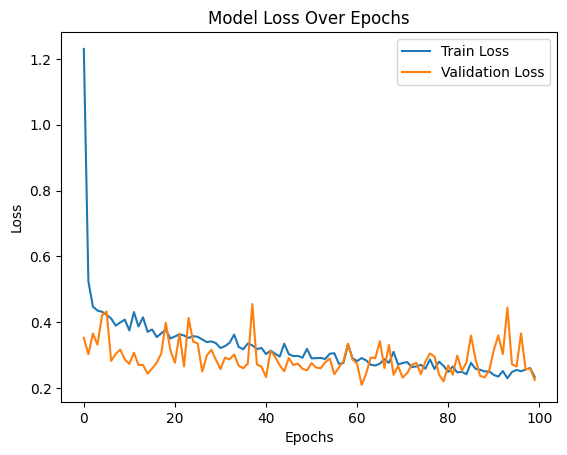

In [96]:
import matplotlib.pyplot as plt
# Plot training & validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()